### Sumário

- Estimador de máxima verssimilhança
- Definindo a balança incerta
- Extraindo informação em meio a incerteza 
- Maximizando a função de verossimilhança numericamente

### Estimador de máxima verssimilhança

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Hoje vamos discutir o estimador de máxima verossimilhança - Maximum likelihood estimation (MLE) e como este pode ser aplicado para extrair informações sobre processos estocásticos. Mais especificamente, vamos usá-lo para estimar parâmetros de um processo com distribuição gaussiana e interpretar o que esta ocorrendo neste exemplo.

Primeiro vamos apresentar o estimador MLE.

O MLE consiste em um método de estimação de parâmetros de uma densidade de probabilidade através da maximização da função verossimilhança. Seu objetivo é fazer inferências sobre o processo, de modo a encontrar o conjunto de parâmetros da pdf que mais se assemelha aos dados amostrados.

Para isso, vamos retomar o conceito função verossimilhança dada pela função:

$L(\overline{x}; \overline{\theta}) = f(\overline{x}/\overline{\theta})$, ou seja, a probabilidade dos dados ocorridos considerando o conjunto de parâmetros $\theta$.

Neste caso, a pdf das variáveis aleátorias é definida por uma família de pdf, usando o MLE vamos encontrar o conjunto de parâmetros $\theta$ que maximiza a função $L(\overline{x}; \overline{\theta})$.

### Definindo uma balança incerta

Para o exemplo que iremos analisar, vamos supor que temos um balança que retorna o peso da uma pessoa de forma incerta, isto é, o resultado lido na balança pode variar de forma aleátória, mas ainda mantendo uma correlação com o valor real do peso da pessoa. 

Para simplificar a análise, vamos supor que esse fenômeno aleatório possa ser modelado com um variável aleátoria X com pdf gaussian com média $\mu$ e desvio padrão $\sigma$. Vamos ainda supor que a média $\mu$ é igual ao peso real da pessoa e que a balança "quase" nunca errará o valor por mais de 0.5kg.

Note que para formular o problema matemáticamente, precisamos formalizar o termo "quase" usando na expressão acima, para isso vamos considerar que 95% das vezes o valor mostrado pela balança vai estar entre o peso real - 0.5kg e o peso real + 0.5kg.

Sabemos que 95% das amostras de uma gaussiana ocorrem entre os valores $\mu + 1.96\sigma$ e $\mu - 1.96\sigma$.

Assim basta ajustar o parâmetro $\sigma$ para que $1.96\sigma$  seja igual a 0.5kg. Portanto, temos $\sigma$ = 0.5/1.96 = 0.255.

Por fim, vamos supor que um pessoa com 70kg se pese duas vezes neste balança.

In [3]:
weight_real = 70
weight_sigma = 0.255

In [4]:
def gaussian(x, mu, std):
    return np.exp(-0.5*((x-mu)/std)**2)/(std*np.sqrt(2*np.pi))

Neste caso, o peso será uma variável aleatória com a seguinte pdf:

In [5]:
x = np.linspace(69, 71, 1000)
gauss = gaussian(x, weight_real, weight_sigma)

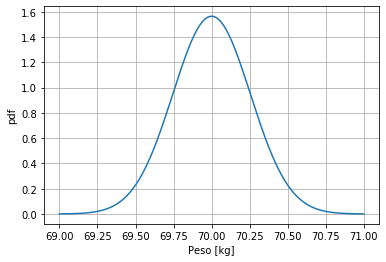

In [8]:
plt.plot(x, gauss)
plt.ylabel("pdf")
plt.xlabel("Peso [kg]")
plt.grid()

In [24]:
from scipy.integrate import quad

Vamos conferir se nosso projeto esta correto, calculando a área sobre a pdf gaussian entre os valores de 69.5kg e 70.5kg e verificar se temos uma probabilidade de 95%. Para isso faremos a integral da pdf nessa faixa de valores usando a função quad do numpy:

In [25]:
quad(gaussian, 69.5, 70.5, args=(weight_real, weight_sigma))[0]

0.9500958113381357

Por fim, vamos simular duas pesagens de uma pessoa de 70kg neste balança, temos:

In [6]:
weight_samples = np.random.normal(weight_real, weight_sigma, 2)
weight_samples

array([70.14408126, 69.99354818])

### Extraindo informação em meio a incerteza 

Segue então algumas perguntas, o que fazer com os dois resultados obtidos?, devemos escolher somente um deles?, combinar os dois?, Se sim, como?.

Embora nosso objetivo seja estimar um número mais próximo possível ao peso real, a melhor ação a se tomar ainda não é clara. Para isso, vamos formalizar a noção de mais próximo possível do peso real.

Dadas as premissas assumidas de que a leitura se comporta como o processo de amostragem de um variável aleatória gaussian cuja média é igual ao peso real, podemos dizer que estimar o valor mais próximo possível corresponde a estimar a média $\mu$ da pdf gaussia.

Ainda sim, não é claro como fazer isso, vamos então adicionar mais um objetivo a nossa missão, vamos procurar pelo valor de $\mu$ que máximiza a probabilidade de termos lidos os valores apresentados na balança.

Essa probabilidade, é dada pela função de verossimilhança:

$L(x_1, x_2; \mu, \sigma) = \prod_{i=1}^{2}f(x_i/\mu,\sigma) = = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x_1 - \mu}{\sigma})^2}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x_2 - \mu}{\sigma})^2} = \frac{1}{2\pi\sigma^2}e^{-\frac{1}{2}(\frac{x_1-\mu}{\sigma})^2-\frac{1}{2}(\frac{x_2 - \mu}{\sigma})^2}$

Onde $x_1$ e $x_2$ são os valores lidos $\sigma$ = 0.255 e $\mu$ é o parâmetro que queremos encontrar.

Vamos então ver qual o valor de $\mu$ que maximiza a função:

$\mu = \underset{\mu}{\operatorname{argmax}}L(x_1, x_2; \mu, \sigma) = \underset{\mu}{\operatorname{argmax}}log(L(x_1, x_2; \mu, \sigma_1, \sigma_2)) = \underset{\mu}{\operatorname{argmax}}-\frac{1}{2}(\frac{x_1-\mu}{\sigma})^2 -\frac{1}{2}(\frac{x_2-\mu}{\sigma})^2= -(x_1-\mu)^2-(x_2-\mu)^2$

Neste caso, para maximizar a função basta derivar em relação a $\mu$ e igualar a 0 temos:

$\frac{\partial{L(x_1, x_2; \mu, \sigma)}}{\partial{\mu}} = 2(x_1-\mu)+2(x_2-\mu)$ = 0

Com isso temos:

$\mu_{max} = \frac{x_1 + x_2}{2}$

Ou seja, segundo o critério MLE a estimativa do peso real é dada pela média dos dois valores lidos, pois este é o valor que mais fará com que o nosso modelo estatístico se aproxime aos dados observados.

### Maximizando a função de verossimilhança numericamente

Vamos verificar isso numericamente de três maneiras, a primeira é plotando a função de verossimilhança para uma faixa de valores de $\mu$ e encontrando o valor máximo.

In [13]:
mu_candidate = np.linspace(69.5, 70.5, 1000)

In [11]:
pdf_mu_sample1 = gaussian(weight_samples[0], mu_candidate, weight_sigma)
pdf_mu_sample2 = gaussian(weight_samples[1], mu_candidate, weight_sigma)
pdf_mu_sample = pdf_mu_sample1*pdf_mu_sample2

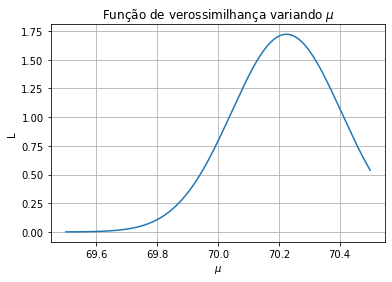

In [14]:
plt.plot(mu_candidate, pdf_mu_sample)
plt.title("Função de verossimilhança variando $\mu$")
plt.ylabel("L")
plt.xlabel("$\mu$")
plt.grid()

In [15]:
mu_candidate[np.argmax(pdf_mu_sample)]

70.22472472472472

A segunda é maximizando a função através de um algorítimo de otimização.

In [16]:
def two_gaussian(mu, x1, x2, std):
    return -1*np.exp(-0.5*((x1-mu)/std)**2)/(std*np.sqrt(2*np.pi))*\
           np.exp(-0.5*((x2-mu)/std)**2)/(std*np.sqrt(2*np.pi))

In [17]:
from scipy.optimize import minimize

In [18]:
minimize(two_gaussian, 70, args=(weight_samples[0], weight_samples[1], weight_sigma))


      fun: -1.7220259046358175
 hess_inv: array([[0.0188804]])
      jac: array([2.98023224e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([70.22495761])

e a terceia é usando a fórmula encontrada ao se resolver o probelma de otimização analiticamente.

In [19]:
np.mean(weight_samples)

70.2249576180728

### Considerações quanto ao MLE

Comparando os valores obtidos numericamente, vemos que o resultado obtido se aproxima do valor de real de 70 kg. De fato, a estimativa do peso melhor será quanto maior o número de pesagens realizadas, pois teremos mais dados para realizar a estimativa de $\mu$. 

É interessante ver como o critério MLE nos permite combinar dados ruidosos e extrair uma informação mais coerentes com os dados observados até então. Porém, é importente atentar que o MLE só "enxerga" os dados usados e ignora qualquer outro contexto, o que pode em algum casos péssimas estimativas em alguns casos. 

### Conclusão

Neste tópico discutimos:

- O estimador de verossimilhança.
- Um exemplo de uma balança aleatória e como ajustar seus parâmetros satisfazendo os requisitos de seu comportamento.
- Como encontrar analiticamente o estimador MLE
- Como encontrar númericamente o estimador MLE
- Consideração e cuidados sobre o resultado obitdo